In [1]:
from data import *
import matplotlib.style as style
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [15]:
features.columns

Index([                    'Total_Power_Parity',
               'Percentage of Owned Households',
                         'Male to Female Ratio',
               'Percentage of Urban Households',
       'Percentage of Households with Internet',
                                   (0.33, 0.66],
                                    (0.66, 1.0],
                                   (0.656, 1.0]],
      dtype='object')

In [2]:
#initialize Linear Regression model 
lr = LinearRegression()

In [3]:
#fit data to model
model = lr.fit(X_train, y_train)

In [4]:
#run test data through Model and test outputs equal to y_pred
y_pred = model.predict(X_test)

In [5]:
style.use('ggplot')

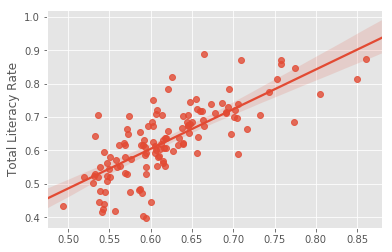

In [12]:
sns.regplot(y_pred, y_test)

In [7]:
#model score (R^2 and Adjusted R2)
r2 = model.score(X_test, y_test)
ar2 = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [8]:
#print R^2, Adjusted R^2, MSE, RMSE, and Normalized RMSE
print('R2:', r2, 'AdjustR2:', ar2)
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Normalized RMSE:',np.sqrt(mean_squared_error(y_test, y_pred))/ y_test.std())

R2: 0.5404890604922513 AdjustR2: 0.509597568760638
MSE: 0.005385920249207483
RMSE: 0.07338882918542497
Normalized RMSE: 0.6752192312818441


In [9]:
kfold5 = KFold(n_splits=5, shuffle=True, random_state=42)
kfold10 = KFold(n_splits=10, shuffle=True, random_state=42)
kfold20 = KFold(n_splits=20, shuffle=True, random_state=42)

In [10]:
#Initial cross validation scores for basic linear regression model
cv_5_results = np.mean((cross_val_score(model, features, target, cv=kfold5)))
cv_10_results = np.mean((cross_val_score(model, features, target, cv=kfold10)))
cv_20_results = np.mean((cross_val_score(model, features, target, cv=kfold20)))

In [11]:
print(cv_5_results, cv_10_results, cv_20_results)

0.4174799344556588 0.4102207573635461 0.38879113519552944
